In [ ]:
"""
DNN model + MNIST + Hyper parameters
  - Network layer 
    input nodes : 28x28 = 784
    hidden1 nodes : 128 - 1층 
    hidden2 nodes : 64 - 2층 
    output nodes : 10 - 3층 
    
 - Hyper parameters  
   lr : 학습율 
   epochs : 전체 dataset 재사용 회수 
   batch size : 1회 data 공급 회수(mini batch) 
   iter size : 반복회수 
    -> 1 epoch(60,000) : batch size(200) * iter size(200)
"""

In [1]:
import tensorflow.compat.v1 as tf # ver1.x
tf.disable_v2_behavior() # ver2.x 사용 안함 
from sklearn.preprocessing import OneHotEncoder # y data 
from sklearn.metrics import accuracy_score # model 평가
import matplotlib.pyplot as plt 
import numpy as np

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
# 1. MNIST dataset load 
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train.shape # images(픽셀) : (60000, 28, 28) -(size, h, w)

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)

In [23]:
x_test.shape

(10000, 28, 28)

In [3]:
y_train.shape # labels(10진수) # (60000,)

(60000,)

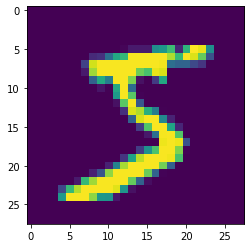

In [4]:
# 첫번째 image 확인 
plt.imshow(x_train[0]) # 5
plt.show()

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
y_train[0]

5

In [7]:
# 2. images 전처리 
# 1) images 정규화 
x_train_nor, x_test_nor = x_train / 255.0, x_test / 255.0

x_train_nor[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [8]:
# 2) 3차원 -> 2차원 
x_train_nor = x_train_nor.reshape(-1, 784)
x_test_nor = x_test_nor.reshape(-1, 784)

x_train_nor.shape # (60000, 784)

(60000, 784)

In [9]:
# 3. labels 전처리
# 1) 1차원 -> 2차원  
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

y_train.shape 

(60000, 1)

In [11]:
y_train[0]

array([5], dtype=uint8)

In [12]:
# 2) ont-hot encoding 
obj = OneHotEncoder()
y_train_one = obj.fit_transform(y_train).toarray()
y_test_one = obj.fit_transform(y_test).toarray()
y_train_one.shape # (60000, 10)

(60000, 10)

In [14]:
y_train_one[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [15]:
# 4. 변수 정의 
X = tf.placeholder(dtype = tf.float32, shape = [None, 784]) # x data
Y = tf.placeholder(dtype = tf.float32, shape = [None, 10]) # y data

In [16]:
# Hyper parameters  
# https://blog.naver.com/qbxlvnf11/221449297033
lr = 0.01 #학습율 
epochs = 20 # 전체 dataset 재사용 회수 
batch_size = 200 # 1회 data 공급 회수(mini batch) 
iter_size = 300 # 반복회수 

In [17]:
# DNN network
# https://seamless.tistory.com/34
hidden1_nodes = 128  
hidden2_nodes = 64

In [18]:
# hidden layer1 : 1층 : relu()
w1 = tf.Variable(tf.random_normal([784, hidden1_nodes]))#[input, output]
b1 = tf.Variable(tf.random_normal([hidden1_nodes])) # [output]
hidden1_output = tf.nn.relu(tf.matmul(X, w1) + b1)

# hidden layer2 : 2층 : relu()
w2 = tf.Variable(tf.random_normal([hidden1_nodes, hidden2_nodes]))#[input, output]
b2 = tf.Variable(tf.random_normal([hidden2_nodes])) # [output]
hidden2_output = tf.nn.relu(tf.matmul(hidden1_output, w2) + b2)

# output layer : 3층 : sotfmax()
w3 = tf.Variable(tf.random_normal([hidden2_nodes, 10]))#[input, output]
b3 = tf.Variable(tf.random_normal([10])) # [output]

# bias node : 
# https://funnypr.tistory.com/entry/The-Basic-Artificial-Neuron-Bias-neuron

In [19]:
# 5. softmax 알고리즘 
# (1) model
model = tf.matmul(hidden2_output, w3) + b3

# (2) softmax
softmax = tf.nn.softmax(model) # 활성함수 

# (3) loss function : Softmaxt + Cross Entorpy
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels = Y, logits = model))

# (4) optimizer 
train = tf.train.AdamOptimizer(lr).minimize(loss) 

# (5) encoding -> decoding 
y_pred = tf.argmax(softmax, axis = 1)
y_true = tf.argmax(Y, axis = 1)

In [21]:
# 6. model training
with tf.Session() as sess :
    sess.run(tf.global_variables_initializer()) # w, b 초기화 
    
    feed_data = {X : x_train_nor, Y : y_train_one}
    
    # epochs = 20 
    for epoch in range(epochs) : # 1세대 
        tot_loss = 0
        
        # 1epoch = 200 * 300
        for step in range(iter_size) :  # 300반복 학습 
            idx = np.random.choice(a=y_train_one.shape[0], 
                                   size=batch_size, replace=False)
            # Mini batch dataset 
            feed_data = {X : x_train_nor[idx], Y : y_train_one[idx]}
            _, loss_val = sess.run([train, loss], feed_dict = feed_data)
            
            tot_loss += loss_val
            
        # 1epoch 종료 
        avg_loss = tot_loss / iter_size
        print("epoch = {}, loss = {}".format(epoch+1, avg_loss))         
        
    # model 최적화 : test 
    feed_data2 = {X : x_test_nor, Y : y_test_one}
    y_pred_re = sess.run(y_pred, feed_dict = feed_data2)
    y_true_re = sess.run(y_true, feed_dict = feed_data2)
    
    acc = accuracy_score(y_true_re, y_pred_re)
    print("accuracy =", acc)

epoch = 1, loss = 23.64809488137563
epoch = 2, loss = 2.595821912288666
epoch = 3, loss = 0.9788974784811337
epoch = 4, loss = 0.5965923030177752
epoch = 5, loss = 0.4634464919070403
epoch = 6, loss = 0.36815356026093166
epoch = 7, loss = 0.3307870642840862
epoch = 8, loss = 0.2857306769241889
epoch = 9, loss = 0.26558296104272205
epoch = 10, loss = 0.2451520971705516
epoch = 11, loss = 0.221746789564689
epoch = 12, loss = 0.20881101794540882
epoch = 13, loss = 0.19307963124165933
epoch = 14, loss = 0.187650342832009
epoch = 15, loss = 0.16999195939550796
epoch = 16, loss = 0.17504350535571575
epoch = 17, loss = 0.15548990276952585
epoch = 18, loss = 0.14099602320541937
epoch = 19, loss = 0.13098532975961766
epoch = 20, loss = 0.14113901949177185
accuracy = 0.9401
